In [231]:
import glob
import numpy as np
import sys
import importlib
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec


from skimage.morphology import area_opening

# Include path to my modules
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
    
# Import my modules
import data_generator_mc_combined
importlib.reload(data_generator_mc_combined)
from data_generator_mc_combined import DataGenerator

In [232]:
# Input parameters
H = 218
W = 170
channels = 24
batch_size = 8
nslices = 256
crop = (15, 15)

train_path = "../../MR_data/train_val_12_channel/Train/"
sampling_mask_path = "../Data/poisson_sampling/R10_218x170.npy"

### Testing the area threshold for extraction of auto calibration signal

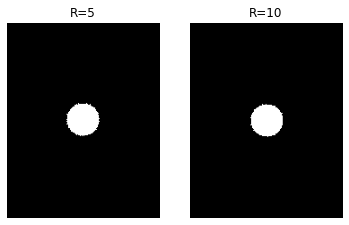

In [233]:
sp_r5 = np.load("../Data/poisson_sampling/R5_218x170.npy")
sp_r10 = np.load("../Data/poisson_sampling/R10_218x170.npy")

test = area_opening(sp_r5[0], area_threshold=10, connectivity=1, parent=None, tree_traverser=None)

test2 = area_opening(sp_r10[0], area_threshold=10, connectivity=1, parent=None, tree_traverser=None)

plt.figure()
plt.subplot(121)
plt.imshow(test,cmap ="gray")
plt.axis("off")
plt.title("R=5")
plt.subplot(122)
plt.imshow(test2,cmap ="gray")
plt.title("R=10")
plt.axis("off")
plt.show()

### Get data for a batch and output combined reference images (combined)

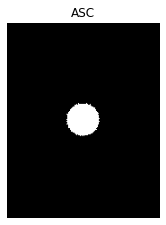

(8, 218, 170)


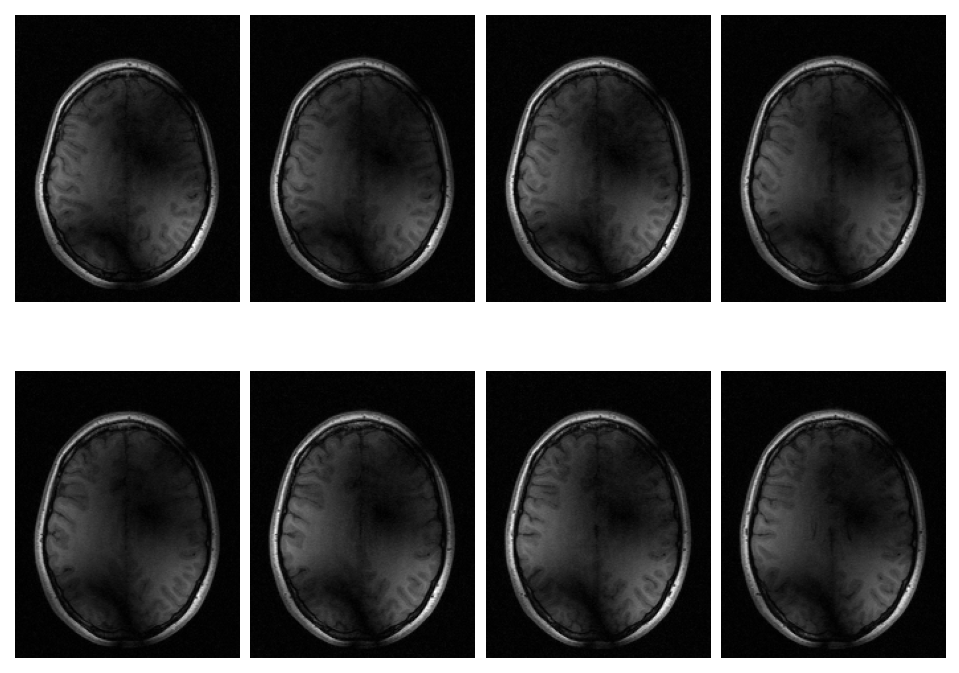

In [245]:
train = glob.glob(train_path + "*.h5")
var_sampling_mask = np.load(sampling_mask_path)

asc = area_opening(var_sampling_mask[0], area_threshold=10, connectivity=1, parent=None, tree_traverser=None)

plt.figure()
plt.subplot(121)
plt.imshow(test,cmap ="gray")
plt.axis("off")
plt.title("ASC")
plt.show()

var_sampling_mask = np.repeat(var_sampling_mask[:, :, :, np.newaxis], 24, axis = -1) 

train_generator = DataGenerator(train, dim = (H, W), under_masks = var_sampling_mask,  crop = crop,\
                            batch_size = batch_size, n_channels = channels, nslices = nslices, shuffle=False, asc = asc)


sample = train_generator[10]

plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(2, 4)
gs1.update(wspace=0.05, hspace=0.1)

sample_img = sample[1]
print(sample_img.shape)

for ii in range(8):
    plt.subplot(gs1[ii])
    plt.imshow(np.abs(sample_img[ii,:,:]),cmap = "gray")
    plt.axis("off")
plt.show()




### Visualize undersampled images as slices (uncombined still)

(218, 170, 12)


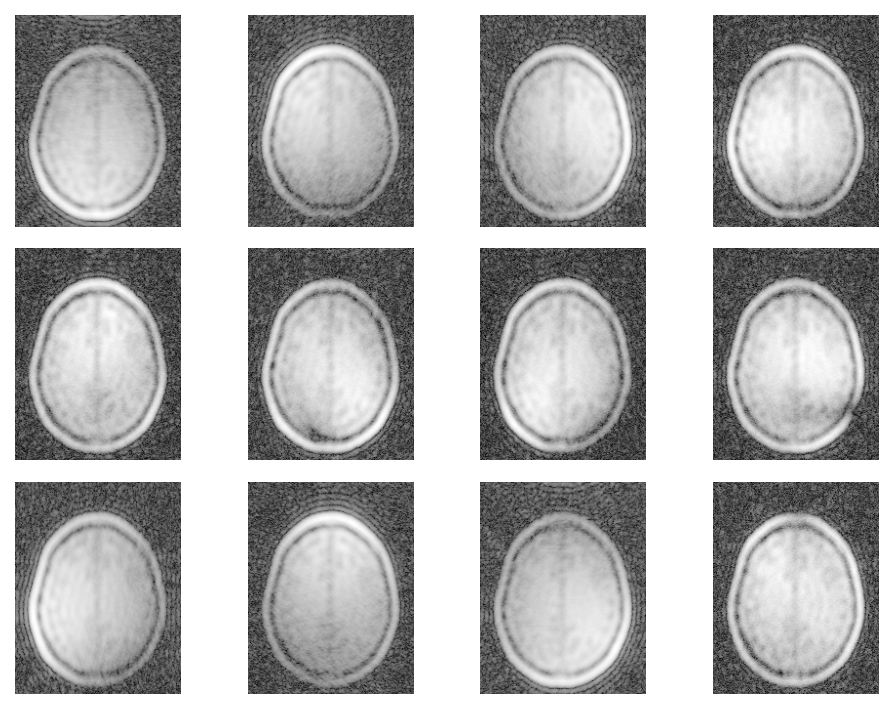

In [188]:
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

sample_img = sample[0][0][1]
sample_img = sample_img[:,:,::2] + 1j*sample_img[:,:,1::2]
sample_img = np.fft.ifft2(sample_img,axes = (0,1))
print(sample_img.shape)
for ii in range(12):
    plt.subplot(gs1[ii])
    plt.imshow(np.log(1+np.abs(sample_img[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()

### Visualize sensitivity maps for above images

(218, 170, 12)


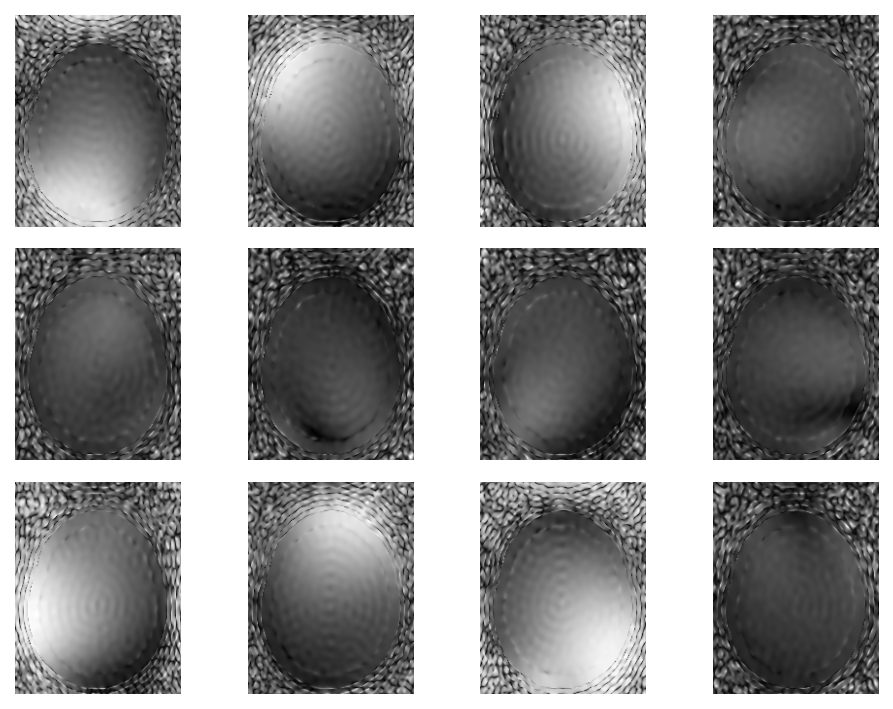

In [236]:
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

sample_img = sample[0][2][1]
print(sample_img.shape)
for ii in range(12):
    plt.subplot(gs1[ii])
    plt.imshow(np.log(1+np.abs(sample_img[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()
